In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.impute import SimpleImputer 
import re 
import nltk 

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

### EDA

In [15]:
df = pd.read_csv('train_data.txt', sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")

In [16]:
df.head(10)

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [17]:
df.shape

(54214, 3)

In [21]:
df.columns

Index(['TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')

In [22]:
df['GENRE'] = df['GENRE'].str.lower()
df['DESCRIPTION'] = df['DESCRIPTION'].str.lower()

In [23]:
df.duplicated().any()

False

In [24]:
df['GENRE'].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: GENRE, dtype: int64

In [27]:
df.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

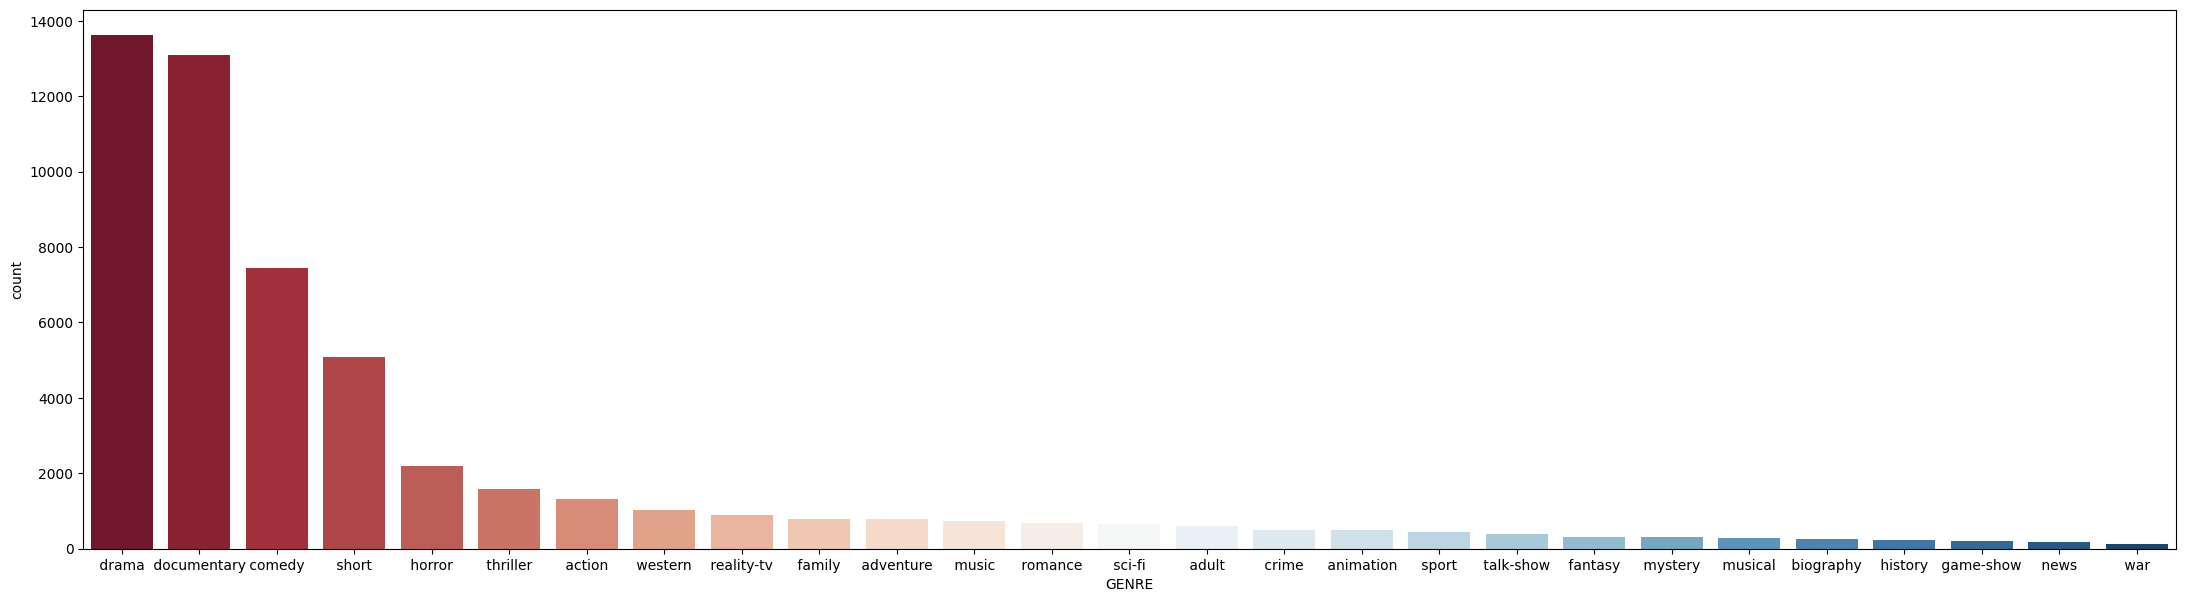

In [62]:
plt.figure(figsize=(27,7))
sns.countplot(data=df, x="GENRE", order= df["GENRE"].value_counts().index, palette = "RdBu",)
plt.show()

In [63]:
df.shape

(54214, 3)

### Label Encoding for Target Axis

In [74]:
WorkingData = df.copy() 

In [75]:
WorkingData = WorkingData.drop('TITLE', axis=1)

In [76]:
WorkingData.head(5)

,GENRE,DESCRIPTION
1,drama,listening in to a conversation between his do...
2,thriller,a brother and sister with a past incestuous r...
3,adult,as the bus empties the students for their fie...
4,drama,to help their unemployed father make ends mee...
5,drama,the film's title refers not only to the un-re...
6,documentary,quality control consists of a series of 16mm ...
7,comedy,in tough economic times max and joey have all...
8,crime,ron petrie (keanu reeves) is a troubled teen ...
9,reality-tv,"a sudden calamitous event, causing great loss..."
10,horror,four high school students embark on a terrify...


In [77]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
WorkingData['GENRE']= label_encoder.fit_transform(WorkingData['GENRE'])

In [78]:
WorkingData['GENRE'].unique()

array([ 8, 24,  1,  7,  5,  6, 18, 13, 22,  3,  0, 10, 21, 20, 14,  2, 23,
       26,  9, 16, 12, 17,  4, 19, 11, 15, 25])

In [26]:
WorkingData_2['GENRE'].value_counts()

8     13613
7     13096
5      7447
21     5073
13     2204
24     1591
0      1315
26     1032
18      884
9       784
2       775
14      731
19      672
20      647
1       590
6       505
3       498
22      432
23      391
10      323
16      319
15      277
4       265
12      243
11      194
17      181
25      132
Name: GENRE, dtype: int64

In [80]:
WorkingData.head(5)

,GENRE,DESCRIPTION
1,8,listening in to a conversation between his do...
2,24,a brother and sister with a past incestuous r...
3,1,as the bus empties the students for their fie...
4,8,to help their unemployed father make ends mee...
5,8,the film's title refers not only to the un-re...


### Data Preprocessing

In [81]:
# Get the list of English stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [82]:
sw = set(stopwords.words('english'))

In [83]:
# Create a new instance of the Porter stemming algorithm
ps = PorterStemmer()

In [88]:
lm = WordNetLemmatizer()

In [86]:
WorkingData["DESCRIPTION"][1]

' listening in to a conversation between his doctor and parents, 10-year-old oscar learns what nobody has the courage to tell him. he only has a few weeks to live. furious, he refuses to speak to anyone except straight-talking rose, the lady in pink he meets on the hospital stairs. as christmas approaches, rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow oscar to live life and love to the full, in the company of his friends pop corn, einstein, bacon and childhood sweetheart peggy blue.'

In [89]:
# Import the Porter stemming algorithm from the NLTK library


# Create a new instance of the Porter stemming algorithm
ps = PorterStemmer()

# Define a function to clean a sample of text
def clean_text(sample):
  # Convert the text to lowercase
  sample = sample.lower()

  # Remove non-alphabetic characters and replace with spaces
  sample = re.sub("[^a-zA-Z]+"," ", sample)

  # Split the text into individual words
  sample = sample.split()

  # Apply stemming to each word and remove stopwords
  sample = [ps.stem(s) for s in sample if s not in sw]

  # Join the stemmed words back into a single string
  sample = " ".join(sample)

  # Return the cleaned text sample
  return sample


In [93]:
clean_text(WorkingData["DESCRIPTION"][1])

'listen convers doctor parent year old oscar learn nobodi courag tell week live furiou refus speak anyon except straight talk rose ladi pink meet hospit stair christma approach rose use fantast experi profession wrestler imagin wit charm allow oscar live life love full compani friend pop corn einstein bacon childhood sweetheart peggi blue'

In [94]:
# Apply the fucntion to dataset text column
WorkingData['DESCRIPTION']= WorkingData['DESCRIPTION'].apply(clean_text)

In [97]:
WorkingData.head()

,GENRE,DESCRIPTION
1,8,listen convers doctor parent year old oscar le...
2,24,brother sister past incestu relationship curre...
3,1,bu empti student field trip museum natur histo...
4,8,help unemploy father make end meet edith twin ...
5,8,film titl refer un recov bodi ground zero also...


In [98]:
# Extract the 'processed_text' column from the WorkingData_2 DataFrame
processed_text = WorkingData['DESCRIPTION']

# Convert the processed text column to a NumPy array
corpus = processed_text.values

In [99]:
corpus

array(['listen convers doctor parent year old oscar learn nobodi courag tell week live furiou refus speak anyon except straight talk rose ladi pink meet hospit stair christma approach rose use fantast experi profession wrestler imagin wit charm allow oscar live life love full compani friend pop corn einstein bacon childhood sweetheart peggi blue',
       'brother sister past incestu relationship current murder relationship murder women reject murder women get close',
       'bu empti student field trip museum natur histori littl tour guid suspect student anoth tour first lectur film co drift dream erot fantasi one imagin film releas emot fantasi erot uncommon way one slip curat offic littl acquisit anoth find anthropologist see bone identifi even head teacher immun soon tour bu depart everyon admit quit educ',
       ...,
       'ze bestaan echt stand comedi grow face fear freer organ spek ronald speak thing watch go recogn peopl okay',
       'walter vivian live countri difficult time

### Data Transformation

In [111]:
# Create a new instance of the CountVectorizer class with max_features set to 1600
cv = CountVectorizer(max_features=1500)

In [112]:
X = cv.fit_transform(corpus).toarray()

In [113]:
X.shape

(54214, 1500)

In [114]:
X[:50]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [61]:
# vectorize = TfidfVectorizer()

# X_train = vectorize.fit_transform(WorkingData["DESCRIPTION"])

# X_test = vectorize.transform(WorkingData["DESCRIPTION"])

In [115]:
y = WorkingData['GENRE'].values

In [116]:
y.shape

(54214,)

In [117]:
y[:100]

array([ 8, 24,  1,  8,  8,  7,  5,  6, 18, 13,  7,  8,  7, 24,  8,  8,  5,
        7, 22,  3,  8,  5,  5,  8,  0, 10, 21, 20, 24,  7, 13,  7,  0,  7,
       14,  5,  8,  8,  5,  5,  7,  5, 21,  8,  2, 24,  7, 21,  8, 24,  7,
        7,  5,  7, 23, 13,  7, 13,  5,  7,  8,  5, 18,  8,  6,  5, 13, 20,
       21,  8,  7,  8,  1,  7, 23,  5,  5,  8, 26,  8, 13,  8, 24,  5,  1,
        9, 16,  8,  7,  8,  7,  8, 20,  9, 24,  7,  8,  8,  8,  7])

In [118]:
## Saving Bow dictionary to later use
# Import the pickle module
import pickle

# Set the path for the output file
bow_path = '01.Model.pkl'

# Use the pickle.dump() function to save the CountVectorizer instance to a file
# The "wb" argument specifies that the file should be opened in binary mode for writing
pickle.dump(cv, open(bow_path, "wb"))

### Dividing Dataset into Training and Test

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Naive Bayes Classifier

In [122]:
# Import the GaussianNB classifier from the sklearn.naive_bayes module
from sklearn.naive_bayes import GaussianNB

# Create an instance of the GaussianNB classifier
classifier = GaussianNB()

# Train the classifier on the training data
# X_train is the input data for training, y_train is the target variable for training
classifier.fit(X_train, y_train)

GaussianNB()

In [123]:
# Make predictions on the test data using the trained classifier
y_pred = classifier.predict(X_test)

# Import the confusion_matrix and accuracy_score functions from the sklearn.metrics module
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute the confusion matrix for the predictions
# y_test is the actual target variable values for the test data, y_pred are the predicted values
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Compute the accuracy score for the predictions
# y_test is the actual target variable values for the test data, y_pred are the predicted values
accuracy_score(y_test, y_pred)

[[  7  10   0   7  17   0  12   2   8   0  42   2  19   1   2  18  26   1
    4   1  14   0  23  10   3   2  17]
 [  1  40   0   3   0   2   2   1   1   0  13   1  10   1   2   6   1   2
    0   0   1   0   5  16   0   0   2]
 [  2  20   7   6   7   0   5   2   3   1  17   0  17   1   1  14   7   2
    2   1   4   0  16   2   0   0  13]
 [  1   4   5  17   5   2   1   4   1   2  19   1   7   0   0  11   5   2
    0   0   2   1   9   6   0   2   0]
 [  2   0   0   3   5   0   1   4   2   1   2   1   8   0   2   2   2   1
    1   0   1   0   1  11   0   1   1]
 [  3 163   4  62  79  52  47  15  38  10 143  37  87   7  35 194 101  32
   26  63  10   3 101 122   4  21  38]
 [  2  11   1   1   4   0  11   1   3   0   8   0  15   3   0   3  15   0
    0   1   3   0   1   2   1   0   4]
 [  9  28  25  74 251   5  48 471  34  28 112  22 375   5 123 113  86  89
   84  21  64  21 229 224   3  33   9]
 [ 13 167  18  84 174  28 105  53 203  31 377  16 278   9  23 257 239  27
   21 148  41  15 106 

0.11269943742506687

In [124]:
# Print the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[  7  10   0   7  17   0  12   2   8   0  42   2  19   1   2  18  26   1
    4   1  14   0  23  10   3   2  17]
 [  1  40   0   3   0   2   2   1   1   0  13   1  10   1   2   6   1   2
    0   0   1   0   5  16   0   0   2]
 [  2  20   7   6   7   0   5   2   3   1  17   0  17   1   1  14   7   2
    2   1   4   0  16   2   0   0  13]
 [  1   4   5  17   5   2   1   4   1   2  19   1   7   0   0  11   5   2
    0   0   2   1   9   6   0   2   0]
 [  2   0   0   3   5   0   1   4   2   1   2   1   8   0   2   2   2   1
    1   0   1   0   1  11   0   1   1]
 [  3 163   4  62  79  52  47  15  38  10 143  37  87   7  35 194 101  32
   26  63  10   3 101 122   4  21  38]
 [  2  11   1   1   4   0  11   1   3   0   8   0  15   3   0   3  15   0
    0   1   3   0   1   2   1   0   4]
 [  9  28  25  74 251   5  48 471  34  28 112  22 375   5 123 113  86  89
   84  21  64  21 229 224   3  33   9]
 [ 13 167  18  84 174  28 105  53 203  31 377  16 278   9  23 257 239  27
   

In [125]:
# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier,'01.naive_bayes_ClassifierModel')

['01.naive_bayes_ClassifierModel']

### SVM

In [137]:
from sklearn.svm import SVC
# Initialize a linear SVM classifier
svm = SVC(kernel='linear', C=1, random_state=42)

In [138]:
svm.fit(X_train, y_train) # Train the SVM model on the training data X_train and corresponding target values y_train
y_pred = svm.predict(X_test) # Use the trained SVM model to make predictions on the test data X_test and store the predictions in y_pred variable


In [139]:
# compute the accuracy of the SVM model predictions on the test data
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.5207968274462788


In [140]:
# Print the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[  77    3    8    3    0   25   12   16   51    3    1    2    0    7
     0    0    0    0    1    1   10    8    2    0   11    1    6]
 [   2   55    5    0    0   19    1    4   14    0    1    0    0    0
     0    0    1    0    1    1    0    4    0    0    0    0    2]
 [  12   15   27    6    0   12    1   20   29    2    3    0    1    5
     0    0    1    0    2    1    3    5    1    0    1    0    3]
 [   3    0    7   21    0   22    0   12   12   11    4    0    0    2
     0    1    1    0    1    1    2    7    0    0    0    0    0]
 [   0    1    1    1    1    1    2   30   11    1    0    0    0    0
     1    0    0    0    0    0    0    1    1    0    0    0    0]
 [  28   39   18   13    4  795   11   88  335   16    5    1    2   15
     7    4    2    1   13   15    4   51    2    7   12    3    6]
 [  11    0    1    0    0   14   12    7   30    0    0    0    0    2
     0    0    3    0    0    0    0    3    0    0    7    0    0]
 

In [141]:
# Exporting NB Classifier to later use in prediction

import joblib
joblib.dump(classifier,'04.SVM_ClassifierModel')

['04.SVM_ClassifierModel']

### Logistic Regression Classifier

In [142]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression Classifier object
lr = LogisticRegression(solver='liblinear', multi_class='auto', random_state=42)

In [143]:
# create a new instance of the logistic regression classifier
lr = LogisticRegression()

# train the logistic regression model on the training data X_train and corresponding target values y_train
lr.fit(X_train, y_train)

# use the trained logistic regression model to make predictions on the test data X_test
y_pred = lr.predict(X_test)

# compute the accuracy of the logistic regression model predictions on the test data
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.5386885548279996


C:\Users\sabbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
# Print the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[  63    4   11    3    0   28   10   20   55    3    2    1    0   11
     0    1    1    0    0    0    6   10    2    1   12    0    4]
 [   1   48    2    0    0   25    0    2   12    0    1    0    0    2
     0    0    1    0    1    0    1   11    0    0    1    0    2]
 [  10   12   27   10    0    6    0   21   36    3    1    0    0    4
     0    1    0    0    3    0    3    4    3    0    2    0    4]
 [   3    0    5   17    0   25    0   11   16   11    3    0    0    2
     1    2    0    0    2    0    3    6    0    0    0    0    0]
 [   1    0    0    1    0    3    2   27   11    1    0    0    1    0
     2    0    0    0    0    0    0    1    1    0    0    0    1]
 [  23   10   11    8    0  790   12   86  377   23    5    0    1   26
     4    2    3    0   13   13    3   67    1    5   11    0    3]
 [   8    0    0    0    0   12   12    9   33    1    0    0    0    2
     0    0    3    0    1    1    0    0    1    0    7    0    0]
 

In [145]:
# Exporting NB Classifier to later use in prediction

import joblib
joblib.dump(classifier,'05.LRC_ClassifierModel')

['05.LRC_ClassifierModel']